# Heart Disease Prediction

In [45]:
import pandas as pd
import numpy as np
import pylab as pl
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

### Importing Data set

In [8]:
df = pd.read_csv("framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
# drop education
df.drop(['education'],inplace=True, axis=1)
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Handling Missing Values

In [11]:
# check for missing values
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [12]:
df.dropna(axis=0, inplace=True)

In [13]:
df.shape

(3751, 15)

In [14]:
df.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### Train Test Splitting

In [35]:
features = df[['age','male','cigsPerDay', 'totChol','sysBP','glucose']]
target = df['TenYearCHD']

In [29]:
# normalize data
features = preprocessing.StandardScaler().fit(features).transform(features)

In [36]:
# Train Test Split
X_train, X_valid, y_train, y_valid = train_test_split(
    features,target, test_size=0.3, random_state=123)

In [37]:
print('Train set: ', X_train.shape, y_train.shape)
print('Validation set: ', X_valid.shape, y_valid.shape)

Train set:  (2625, 6) (2625,)
Validation set:  (1126, 6) (1126,)


# EDA

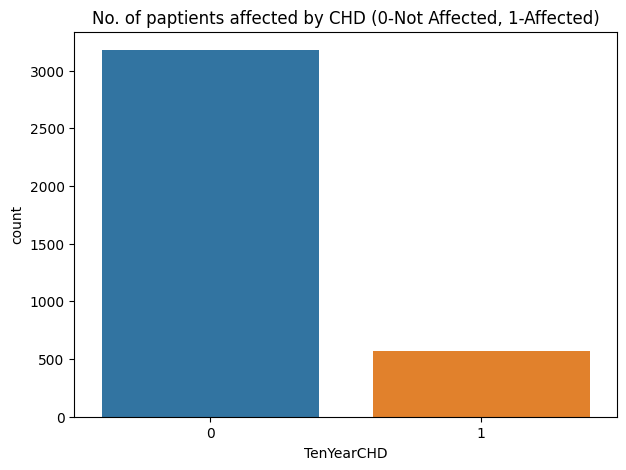

In [40]:
# No.of patients affected CHD
plt.figure(figsize=(7,5))
sns.countplot(x='TenYearCHD', data=df)
plt.title("No. of paptients affected by CHD (0-Not Affected, 1-Affected)")
plt.show()

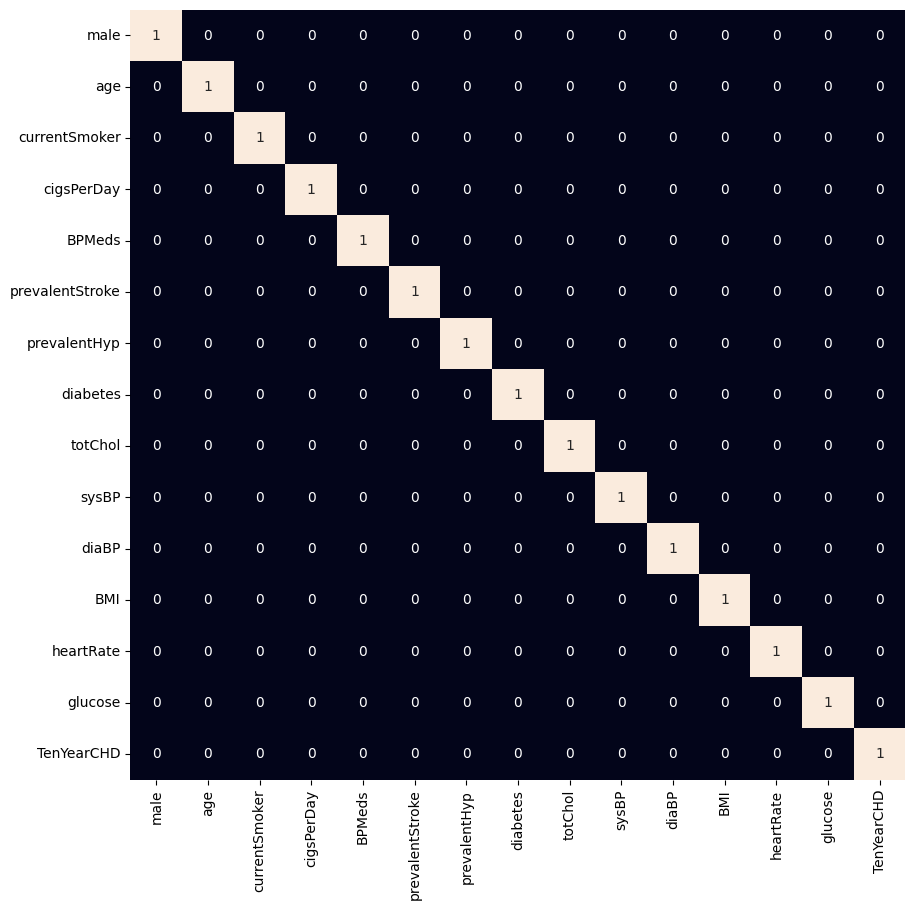

In [43]:
# Correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() > 0.9, annot=True,cbar=False)
plt.show()

### Model Fitting & Evalution

In [48]:
# model fitting
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_valid)

In [49]:
# model evaluating
print("Model Accuray: ", accuracy_score(y_valid,y_pred))

Model Accuray:  0.8561278863232682


In [52]:
# confusion metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_valid,y_pred)
cm

array([[954,   7],
       [155,  10]], dtype=int64)

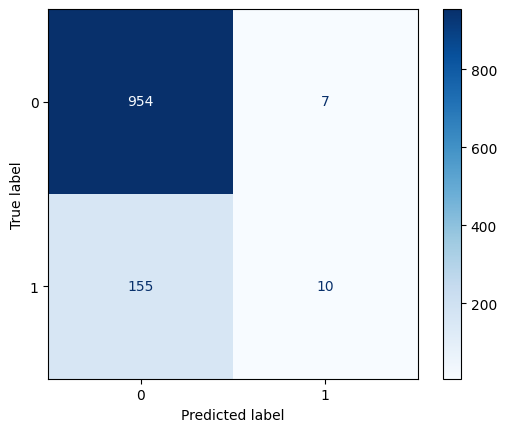

In [54]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [55]:
print("Confusion Mertix details: ")
print(classification_report(y_valid,y_pred))

Confusion Mertix details: 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       961
           1       0.59      0.06      0.11       165

    accuracy                           0.86      1126
   macro avg       0.72      0.53      0.52      1126
weighted avg       0.82      0.86      0.80      1126



Logistic regression model achieved an overall accuracy of 86%, which indicates that 86% of the predictions were correct. For class 0, the model performed very well with a high precision of 0.86, recall of 0.99, and F1-score of 0.92, meaning it correctly identified most of the actual negatives. However, for class 1, the model struggled, with a low precision of 0.59, recall of 0.06, and F1-score of 0.11, indicating it missed many actual positives. This discrepancy suggests the model is biased towards the majority class (class 0), likely due to the imbalanced dataset